In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential

## Loading data

In [37]:
data = pd.read_csv("./creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploring data

In [38]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [39]:
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
train_index = y_train[y_train == 0].index
train_data = X_train.loc[train_index]

train_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89


In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(train_data.copy())
X_test_scaled = scaler.fit_transform(X_test)

## Defining model

In [43]:
class Autoencoder(Model):
	def __init__(self):
		super().__init__()
		
		self.encoder = Sequential([
			Dense(64, activation='relu'),
			Dropout(0.1),
			Dense(32, activation='relu'),
		])
		
		self.code = Sequential([
			Dense(16, activation='relu')
		])
		
		self.decoder = Sequential([
			Dense(32, activation='relu'),
			Dropout(0.1),
			Dense(64, activation='relu'),
			Dropout(0.1),
			Dense(X_train.shape[1], activation='sigmoid')
		])
		
	def call(self, inputs, *args):
		encoded_inputs = self.encoder(inputs)
		code = self.code(encoded_inputs)
		decoded_inputs = self.decoder(code)
		return decoded_inputs

## Training the model

In [44]:
model = Autoencoder()

model.compile(optimizer='adam', loss='mse')

In [45]:
history = model.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=128, validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/10
1777/1777 [==============================] - 6s 3ms/step - loss: 0.0025 - val_loss: 0.0167
Epoch 2/10
1777/1777 [==============================] - 4s 3ms/step - loss: 8.2955e-04 - val_loss: 0.0158
Epoch 3/10
1777/1777 [==============================] - 4s 2ms/step - loss: 6.5749e-04 - val_loss: 0.0152
Epoch 4/10
1777/1777 [==============================] - 5s 3ms/step - loss: 5.9066e-04 - val_loss: 0.0146
Epoch 5/10
1777/1777 [==============================] - 4s 2ms/step - loss: 5.4849e-04 - val_loss: 0.0143
Epoch 6/10
1777/1777 [==============================] - 4s 2ms/step - loss: 5.1880e-04 - val_loss: 0.0143
Epoch 7/10
1777/1777 [==============================] - 5s 3ms/step - loss: 5.0108e-04 - val_loss: 0.0142
Epoch 8/10
1777/1777 [==============================] - 5s 3ms/step - loss: 4.8726e-04 - val_loss: 0.0141
Epoch 9/10
1777/1777 [==============================] - 5s 3ms/step - loss: 4.7413e-04 - val_loss: 0.0139
Epoch 10/10
1777/1777 [===========================

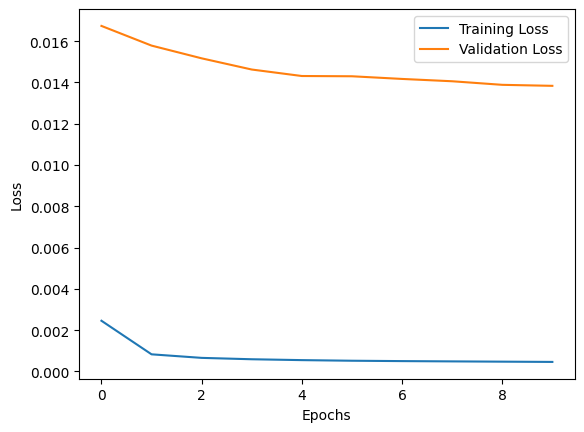

In [46]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Finding threshold for fraud transaction

In [47]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [48]:
threshold = find_threshold(model, X_train_scaled)
print(f'Threshold: {threshold}')

7108/7108 [==============================] - 6s 851us/step
Threshold: 0.000489491093219802


## Making predictions

In [49]:
y_preds = get_predictions(model, X_test_scaled, threshold)

print(accuracy_score(y_test, y_preds))

1781/1781 [==============================] - 2s 868us/step
0.9982795547909132


In [50]:
predictions = model.predict(X_test_scaled)
mse = tf.keras.losses.mse(predictions, X_test_scaled)

1781/1781 [==============================] - 2s 843us/step


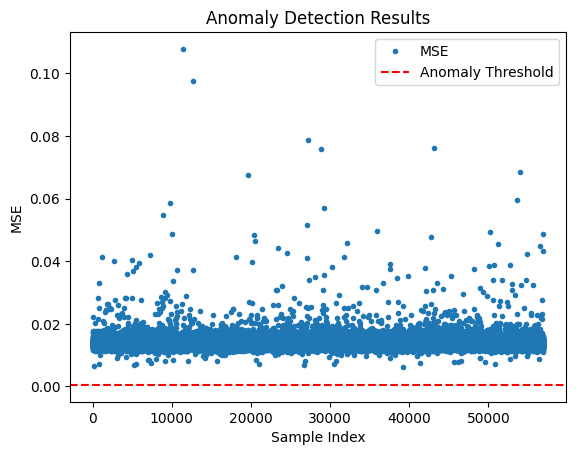

In [51]:
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

# Extras

# Using SMOTE for handling class imbalance

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_test_sampled, y_test_sampled = smote.fit_resample(X_test, y_test)

In [21]:
model = Autoencoder()

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [22]:
history1 = model.fit(X_train_sampled, X_train_sampled, epochs=10, validation_data=(X_test_sampled, X_test_sampled))

Epoch 1/10
12438/12438 [==============================] - 16s 1ms/step - loss: 26.2095 - accuracy: 0.8671 - val_loss: 13.8113 - val_accuracy: 0.9110
Epoch 2/10
12438/12438 [==============================] - 15s 1ms/step - loss: 11.2592 - accuracy: 0.9307 - val_loss: 13.7872 - val_accuracy: 0.9202
Epoch 3/10
12438/12438 [==============================] - 15s 1ms/step - loss: 11.0653 - accuracy: 0.9305 - val_loss: 13.4958 - val_accuracy: 0.9264
Epoch 4/10
12438/12438 [==============================] - 15s 1ms/step - loss: 10.6492 - accuracy: 0.9425 - val_loss: 13.4008 - val_accuracy: 0.9454
Epoch 5/10
12438/12438 [==============================] - 18s 1ms/step - loss: 10.7330 - accuracy: 0.9460 - val_loss: 13.4401 - val_accuracy: 0.9428
Epoch 6/10
12438/12438 [==============================] - 16s 1ms/step - loss: 10.6636 - accuracy: 0.9473 - val_loss: 13.4262 - val_accuracy: 0.9378
Epoch 7/10
12438/12438 [==============================] - 15s 1ms/step - loss: 10.6734 - accuracy: 0.9495 

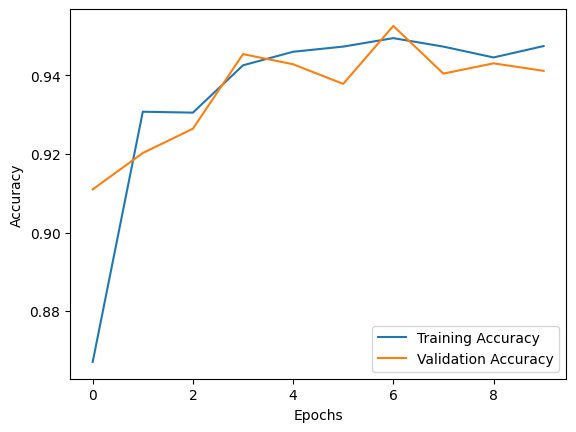

In [23]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

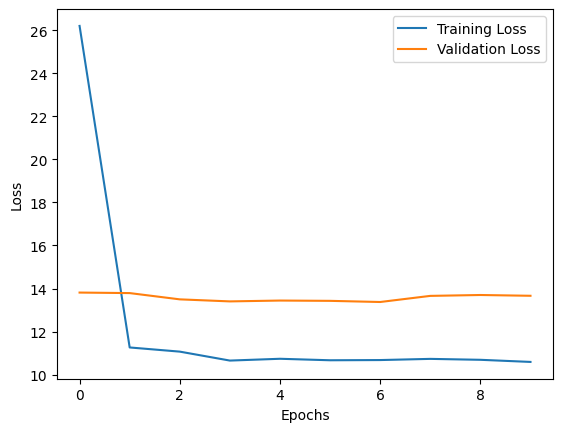

In [24]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
threshold = find_threshold(model, X_train_sampled)
print(f'Threshold: {threshold}')

12438/12438 [==============================] - 9s 696us/step
Threshold: 0.14403237402439117


In [26]:
y_preds = get_predictions(model, X_test, threshold)
print(accuracy_score(y_test, y_preds))

2671/2671 [==============================] - 2s 663us/step
0.14154465550132836
